In [6]:
import scanpy as sc 
# import numpy as np
# import pandas as pd 
# import SEACells

# import sys
# sys.path.append('./src')
# from simulation import create_simulated_adata

In [2]:
import metashells as ms
from metashells.simulation import create_simulated_adata

In [3]:
adata = create_simulated_adata(n_genes=3000, n_cells=5000, n_samples=3, seed=7)
adata

AnnData object with n_obs × n_vars = 5000 × 3000
    obs: 'sample'

In [4]:
adata.X.min(), adata.X.max()

(0, 78)

In [7]:
adata.layers['raw_count'] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

adata.layers['normalized_counts'] = adata.X
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata.X.min(), adata.X.max()

(0.0, 2.6427019)

/ix/djishnu/alw399/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


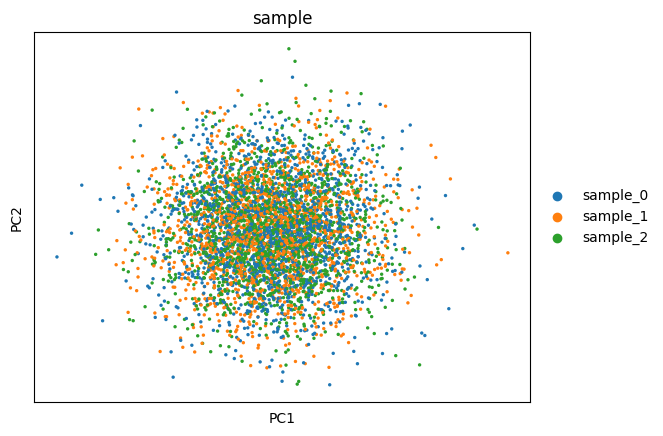

In [8]:
sc.tl.pca(adata)
sc.pl.pca(adata, color='sample')

In [7]:
## IMPORTANT: Batch correction may be needed for real data!! 

# sc.external.pp.harmony_integrate(adata, 'Sample')
# sc.pl.embedding(adata, basis='X_pca_harmony', color=['y', 'Sample'])

In [9]:
import os 

results_dir = './tutorial_outputs'
os.makedirs(results_dir, exist_ok=True)

In [ ]:
from metashells.seashells import SeaShells 

# to parallelize, simply submit multiple jobs running the following code

conch = SeaShells(
    adata_full = adata, 
    results_dir = results_dir,
    cells_per_metacell = 30, # recommended is 75 but can go as low as ~20 if really needed
    sample_col = 'sample'
)
conch.run()


Welcome to SEACells!
Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


/ihome/djishnu/alw399/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


  0%|          | 0/1656 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/1656 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/1656 [00:00<?, ?it/s]

Constructing CSR matrix...
Building kernel on X_pca
Computing diffusion components from X_pca for waypoint initialization ... 
Done.
Sampling waypoints ...
Done.
Selecting 54 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|██████████| 11/11 [00:00<00:00, 194.27it/s]

Selecting 1 cells from greedy initialization.
Randomly initialized A matrix.


Setting convergence threshold at 0.00075
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Starting iteration 30.
Completed iteration 30.
Starting iteration 40.
Completed iteration 40.
Converged after 45 iterations.
Welcome to SEACells!
Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


/ihome/djishnu/alw399/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


  0%|          | 0/1657 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/1657 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/1657 [00:00<?, ?it/s]

Constructing CSR matrix...
Building kernel on X_pca
Computing diffusion components from X_pca for waypoint initialization ... 
Done.
Sampling waypoints ...
Done.
Selecting 54 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|██████████| 11/11 [00:00<00:00, 180.64it/s]


Selecting 1 cells from greedy initialization.
Randomly initialized A matrix.
Setting convergence threshold at 0.00074
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Starting iteration 30.
Completed iteration 30.
Converged after 36 iterations.
Welcome to SEACells!
Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


/ihome/djishnu/alw399/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


  0%|          | 0/1687 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/1687 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/1687 [00:00<?, ?it/s]

Constructing CSR matrix...
Building kernel on X_pca
Computing diffusion components from X_pca for waypoint initialization ... 
Done.
Sampling waypoints ...
Done.
Selecting 54 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|██████████| 12/12 [00:00<00:00, 180.38it/s]


Selecting 2 cells from greedy initialization.
Randomly initialized A matrix.
Setting convergence threshold at 0.00075
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Starting iteration 30.
Completed iteration 30.
Converged after 38 iterations.
